In [16]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
connect_sql = sqlite3.connect('/content/drive/MyDrive/ex07_42/checking-logs.sqlite')

In [18]:
df = pd.read_sql('select t.timestamp from checker t where t.uid like "user%"', connect_sql, parse_dates=['timestamp'])
df

,timestamp
0,2020-04-17 05:19:02.744528
1,2020-04-17 05:22:35.249331
2,2020-04-17 05:22:45.549397
3,2020-04-17 05:34:14.691200
4,2020-04-17 05:34:24.422370
...,...
3202,2020-05-21 20:19:06.872761
3203,2020-05-21 20:22:41.785725
3204,2020-05-21 20:22:41.877806
3205,2020-05-21 20:37:00.129678


In [19]:
df['date'] = df['timestamp'].dt.floor('d')
df['hour'] = df['timestamp'].dt.hour
df = df.drop('timestamp', axis=1)

In [22]:
working_day = df.loc[df['date'].dt.dayofweek < 5]['hour']
weekend = df.loc[df['date'].dt.dayofweek >= 5]['hour']
working_day = working_day.reset_index(drop=True)
weekend = weekend.reset_index(drop=True)

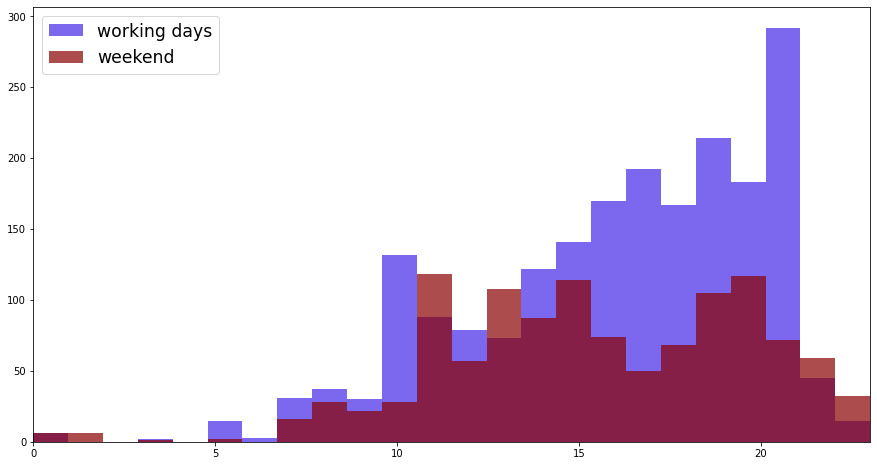

In [23]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.hist(working_day, bins=24, label='working days', color='mediumslateblue')
ax.hist(weekend, bins=24, label='weekend', color='darkred', alpha=0.7)
ax.set_xlim(0, 23)
ax.legend(loc='upper left', fontsize='xx-large')
plt.show()

«Были ли часы, когда общее количество коммитов в выходные было выше, чем
в рабочие дни?» 11 13